# Pandas - Timeseries Data

## Pandas의 자료형
1. int64
2. float64
3. bool
4. str = object, category
5. datetime
6. timedata

## 시계열 데이터
- time
- calendar
- datetime
    * 단점 보완: dateutil, pytz, pendulum
- 시계열 데이터 분석: 시간과 날짜로 데이터 분석.

In [1]:
from datetime import datetime
dir(datetime)

['__add__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rsub__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 'astimezone',
 'combine',
 'ctime',
 'date',
 'day',
 'dst',
 'fold',
 'fromordinal',
 'fromtimestamp',
 'hour',
 'isocalendar',
 'isoformat',
 'isoweekday',
 'max',
 'microsecond',
 'min',
 'minute',
 'month',
 'now',
 'replace',
 'resolution',
 'second',
 'strftime',
 'strptime',
 'time',
 'timestamp',
 'timetuple',
 'timetz',
 'today',
 'toordinal',
 'tzinfo',
 'tzname',
 'utcfromtimestamp',
 'utcnow',
 'utcoffset',
 'utctimetuple',
 'weekday',
 'year']

datetime: 시간, 날짜, 시간+날짜로 라이브러리 구성.

In [2]:
type(datetime)

type

datetime.datetime = built-in class(built-in class이기에 대문자로 쓰지 않는다)

In [3]:
temp = datetime(2018, 7, 31)
temp

datetime.datetime(2018, 7, 31, 0, 0)

temp: datetime class를 2018년 7월 31일 0시 0분으로 instantiate.

In [4]:
print(temp.day)
print(temp.today())

31
2018-07-31 22:03:05.303904


In [5]:
print(temp.strftime('%a'))
print(temp.strftime('%A'))
print(temp.strftime('%z'))
print(temp.strftime('%y=%a'))
print(temp.strftime('%Y년 %m월 %d일(%A)'))

Tue
Tuesday

18=Tue
2018년 07월 31일(Tuesday)


strftime: 주어진 format에 따라 str로 출력.

datetime 단점: 연산이 느리다. => NumPy로 개선.

NumPy 특징
- 속도 빠름(선형대수를 활용한 vector 기반 연산이므로)
- pandas의 내부 구조는 NumPy로 구성됨.
- 날짜 계산 가능.

In [13]:
import numpy as np
import pandas as pd

date = np.array('2018-07-31', dtype = np.datetime64)
date

array('2018-07-31', dtype='datetime64[D]')

In [7]:
date + np.arange(12)

array(['2018-07-31', '2018-08-01', '2018-08-02', '2018-08-03',
       '2018-08-04', '2018-08-05', '2018-08-06', '2018-08-07',
       '2018-08-08', '2018-08-09', '2018-08-10', '2018-08-11'],
      dtype='datetime64[D]')

현재 날짜를 포함한 12일의 날짜 계산.

In [11]:
print(np.datetime64('2018-07-31'))
print(np.datetime64('2018-07-31 22:08'))

2018-07-31
2018-07-31T22:08


numpy datetime64 객체를 만드는 다양한 방법.

In [12]:
print(np.datetime64('2018-07-31 22:08', 'ns'))

2018-07-31T22:08:00.000000000


timezone 설정 가능.

In [14]:
date = pd.to_datetime('2018/7/31')
date

Timestamp('2018-07-31 00:00:00')

주로 사용하는 포맷의 경우 자동으로 timestamp로 바꿔줄 수 있다.

In [15]:
date = pd.to_datetime('2018년 7월 31일')

ValueError: ('Unknown string format:', '2018년 7월 31일')

한글은 지원 안됨.

In [16]:
date.strftime('%Y')

'2018'

pandas를 활용해도 strftime함수 사용 가능.

In [18]:
from IPython import InteractiveShell

InteractiveShell.ast_node_interactivity = 'all'

In [20]:
date + pd.to_timedelta(3, 'D')
date + pd.to_timedelta(3, 'H')
date + pd.to_timedelta(3, 'W')

Timestamp('2018-08-03 00:00:00')

Timestamp('2018-07-31 03:00:00')

Timestamp('2018-08-21 00:00:00')

- timestamp: 시각(하나의 특정 시점)
- timedelta: ~시간 뒤/전
    * 옵션에 따라 일, 시간, 주 등을 정할 수 있다.

시간 데이터는 astype으로 변환 불가.

In [21]:
index = pd.DatetimeIndex(['2018-07-31', '2018-08-01', '2018-08-02', '2018-08-03'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2018-07-31    0
2018-08-01    1
2018-08-02    2
2018-08-03    3
dtype: int64

날짜를 index로 하여 class 방식으로 instantiate해 series 생성.

In [22]:
a = pd.Series([1, 2, 3, 4])
a

0    1
1    2
2    3
3    4
dtype: int64

index옵션을 설정하지 않으면(Rangeindex를 설정하지 않으면) 기본값으로 0, 1, 2, 3, ...이 들어간다.

In [23]:
a = pd.Series([1, 2, 3, 4], ['a', 'b', 'c', 'd'])
a

a    1
b    2
c    3
d    4
dtype: int64

a, b, c, d를 index로 설정하였다.

In [24]:
data['2018-07-31':'2018-08-04']

2018-07-31    0
2018-08-01    1
2018-08-02    2
2018-08-03    3
dtype: int64

날짜를 slicing하여 index로 설정하였다.

In [25]:
data['2018-07-31']

0

index를 날짜로 설정하였으므로 날짜를 사용하여 slicing, index이 가능하다.

In [26]:
data.loc['2018-08-01']

1

In [28]:
data.iloc[0]

0

data = series이기 때문에 loc, iloc도 가능하다.

In [29]:
data['2018']

2018-07-31    0
2018-08-01    1
2018-08-02    2
2018-08-03    3
dtype: int64

In [30]:
data['2018-07']

2018-07-31    0
dtype: int64

날짜를 사용하여 필터링도 가능함(연, 월, 일 필터링)

In [32]:
dates = pd.to_datetime([datetime(2018, 7, 31), '1st of August, 2018', '2018-08-02', '08-02-2018', '20180803'])
dates

DatetimeIndex(['2018-07-31', '2018-08-01', '2018-08-02', '2018-08-02',
               '2018-08-03'],
              dtype='datetime64[ns]', freq=None)

다양한 방법으로 날짜 입력 가능.

In [34]:
dates.to_period('D')
dates - dates[0]

PeriodIndex(['2018-07-31', '2018-08-01', '2018-08-02', '2018-08-02',
             '2018-08-03'],
            dtype='period[D]', freq='D')

TimedeltaIndex(['0 days', '1 days', '2 days', '2 days', '3 days'], dtype='timedelta64[ns]', freq=None)

datetime 객체를 period 객체로 바꿨다. => dates의 각 날짜들을 첫번째 날짜를 기준으로 몇일이 경과한 값인지 구할 수 있다.
- datetime: 시각
- periodindex: 기간 => 사칙연산 가능(주기 설정 가능: D=일, H=시, M=월, ...)

In [41]:
pd.date_range('2018-07-01', '2018-07-31')

DatetimeIndex(['2018-07-01', '2018-07-02', '2018-07-03', '2018-07-04',
               '2018-07-05', '2018-07-06', '2018-07-07', '2018-07-08',
               '2018-07-09', '2018-07-10', '2018-07-11', '2018-07-12',
               '2018-07-13', '2018-07-14', '2018-07-15', '2018-07-16',
               '2018-07-17', '2018-07-18', '2018-07-19', '2018-07-20',
               '2018-07-21', '2018-07-22', '2018-07-23', '2018-07-24',
               '2018-07-25', '2018-07-26', '2018-07-27', '2018-07-28',
               '2018-07-29', '2018-07-30', '2018-07-31'],
              dtype='datetime64[ns]', freq='D')

date_range: 기간을 정해 한번에 datetimeindex를 만들 수 있다.

In [42]:
pd.date_range('2018-07-31', periods=5)

DatetimeIndex(['2018-07-31', '2018-08-01', '2018-08-02', '2018-08-03',
               '2018-08-04'],
              dtype='datetime64[ns]', freq='D')

periods 옵션: 주어진 날짜를 포함하여 datetimeindex에 몇개의 날짜를 넣을지 결정.

In [43]:
pd.date_range('2018-07-31', periods=5, freq='M')

DatetimeIndex(['2018-07-31', '2018-08-31', '2018-09-30', '2018-10-31',
               '2018-11-30'],
              dtype='datetime64[ns]', freq='M')

freq='M': 주어진 날짜가 포함된 월의 말일을 기준으로 월단위로 5개의 날짜를 datetimeindex에 넣는다.

In [44]:
import pandas as pd
import numpy as np
import datetime

date = datetime.date(year=2018, month=7, day=31)
time = datetime.time(hour=22, minute=37, second=19, microsecond=124137)
dt = datetime.datetime(year=2018, month=7, day=31, hour=22, minute=37, second=19, microsecond=124137)

In [45]:
print(date)
print(time)
print(dt)

2018-07-31
22:37:19.124137
2018-07-31 22:37:19.124137


여러 방법으로 datetime object 생성.

In [48]:
td = datetime.timedelta(weeks=2, days=5, hours=10, minutes=20, seconds=6.5, milliseconds=99, microseconds=8)
td

datetime.timedelta(19, 37206, 599008)

timedelta object 생성.

In [50]:
date + td
date - td
dt + td
time + td

datetime.date(2018, 8, 19)

datetime.date(2018, 7, 12)

datetime.datetime(2018, 8, 20, 8, 57, 25, 723145)

TypeError: unsupported operand type(s) for +: 'datetime.time' and 'datetime.timedelta'

datetime object와 timedelta object간 사칙연산 가능.
- time과 timedelta는 연산 불가능: time에는 _ _ add_ _가 정의되어 있지 않기 때문에.

In [52]:
pd.Timestamp(year=2018, month=7, day=31, hour=22, minute=44, second=19, microsecond=99)
pd.Timestamp('2018-07-31')
pd.Timestamp('7/31/2018')

Timestamp('2018-07-31 22:44:19.000099')

Timestamp('2018-07-31 00:00:00')

Timestamp('2018-07-31 00:00:00')

여러 방법으로 timestamp 객체 생성 가능.
- 월이 될 수 있는 문자 발견시 자동으로 월로 설정, 발견 못할시 뒷내용에서 찾음.
- 날짜형식을 자동으로 파싱.

In [53]:
pd.Timestamp(500)
pd.Timestamp(10000, 'D')

Timestamp('1970-01-01 00:00:00.000000500')

Timestamp('1970-01-01 00:00:00.000010', freq='D')

숫자를 넣으면 1970년 1월 1일을 기준으로 경과한 값을 계산.(기본 단위: microsecond단위)

In [54]:
pd.to_datetime(66, unit='D', origin='2017-05-16')

Timestamp('2017-07-21 00:00:00')

origin을 기준으로 시간 경과 계산 가능.

In [55]:
s = pd.Series([10, 100, 1000, 10000])
pd.to_datetime(s, unit='D')

0   1970-01-11
1   1970-04-11
2   1972-09-27
3   1997-05-19
dtype: datetime64[ns]

series의 각 원소들에 대해 origin에서 시간 경과 계산 가능.

In [57]:
s = pd.Series(['8-1-2018', '3-11-1994', '31/7/2018', '40/33/2018'])
pd.to_datetime(s, dayfirst=True, errors='coerce')

0   2018-01-08
1   1994-11-03
2   2018-07-31
3          NaT
dtype: datetime64[ns]

In [58]:
s = pd.Series(['8-1-2018', '3-11-1994', '31/7/2018', '40/33/2018'])
pd.to_datetime(s, dayfirst=True, errors='error')

AssertionError: 

to_datetime
- 주어진 날짜를 datetime으로 변환.
- errors='coerce': 변환 실패시 NaT(Not a Time) 반환
- errors='error': 변환 실패시 에러

pandas의 errors 옵션: 에러를 낼지 다른 값을 반환할지 설정하는 옵션.

In [62]:
pd.Timedelta(days=5, minutes=7.34)
pd.Timedelta(100, unit='W')

Timedelta('5 days 00:07:20.400000')

Timedelta('700 days 00:00:00')

unit='W' => 7일이므로 100*7 = 700일.

In [63]:
pd.to_timedelta('5days', errors='coerce')
pd.to_timedelta('5dayz', errors='coerce')

Timedelta('5 days 00:00:00')

NaT

z로 입력하면 인식 안됨.

In [64]:
pd.to_timedelta('67:15:45.454')

Timedelta('2 days 19:15:45.454000')

In [65]:
s = pd.Series([10, 100])
pd.to_timedelta(s, unit='s')

0   00:00:10
1   00:01:40
dtype: timedelta64[ns]

series의 모든 원소에 대해 초단위로 timedelta형태로 변형.

In [67]:
pd.Timedelta('12 days 5 hours 3 minutes') * 2
time_strings=['2 days 24 minutes 89.67 seconds', '00:45:23.6']
pd.to_timedelta(time_strings)

Timedelta('24 days 10:06:00')

TimedeltaIndex(['2 days 00:25:29.670000', '0 days 00:45:23.600000'], dtype='timedelta64[ns]', freq=None)

to_timedelta
- 시간에 대한 연산을 위해 입력된 시간을 timedelta로 변환.
- timedelta로 변형한 후 연산도 가능함.

In [68]:
pd.Timestamp('8/31/2017') + pd.Timedelta('12 days 5 hours 3 minutes')*2

Timestamp('2017-09-24 10:06:00')

In [70]:
ts = pd.Timestamp('2018-07-31 23:04:19.9')
ts.year
ts.month

2018

7

In [71]:
ts.ceil('h')
ts.round('h')
ts.floor('h')

Timestamp('2018-08-01 00:00:00')

Timestamp('2018-07-31 23:00:00')

Timestamp('2018-07-31 23:00:00')

timestamp 객체도 연산 가능.

In [72]:
temp = pd.to_datetime('2018-07-30')
type(temp)

pandas._libs.tslibs.timestamps.Timestamp

In [73]:
temptimeList = ['2018-07-30', '2018-07-31']
temptimeList = pd.to_datetime(temptimeList)
type(temptimeList)

pandas.core.indexes.datetimes.DatetimeIndex

to_datetime
- 인자 1개: timestamp
- 인자 2개 이상: datetimeindex

___

### 예시 - Billboard 데이터

In [36]:
billboard = pd.read_csv('billboard.csv', engine='python')
billboard

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2000,Janet,Doesn't Really Matter,4:17,Rock,2000-06-17,2000-08-26,59,52.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2000,Destiny's Child,Say My Name,4:31,Rock,1999-12-25,2000-03-18,83,83.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2000,"Iglesias, Enrique",Be With You,3:36,Latin,2000-04-01,2000-06-24,63,45.0,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2000,Sisqo,Incomplete,3:52,Rock,2000-06-24,2000-08-12,77,66.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,81,54.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
temp_data = pd.to_datetime(billboard['date.entered'])
billboard['date.entered'] = temp_data

In [39]:
billboard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 83 columns):
year               317 non-null int64
artist.inverted    317 non-null object
track              317 non-null object
time               317 non-null object
genre              317 non-null object
date.entered       317 non-null datetime64[ns]
date.peaked        317 non-null object
x1st.week          317 non-null int64
x2nd.week          312 non-null float64
x3rd.week          307 non-null float64
x4th.week          300 non-null float64
x5th.week          292 non-null float64
x6th.week          280 non-null float64
x7th.week          269 non-null float64
x8th.week          260 non-null float64
x9th.week          253 non-null float64
x10th.week         244 non-null float64
x11th.week         236 non-null float64
x12th.week         222 non-null float64
x13th.week         210 non-null float64
x14th.week         204 non-null float64
x15th.week         197 non-null float64
x16th.week       

object 형태였던 date.entered column을 datetime64 형태로 바꿨다.

___

### 예시 - 범죄 데이터

In [74]:
crime = pd.read_hdf('crime.h5')
crime

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0
3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0
4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0
5,violation-of-restraining-order,all-other-crimes,2014-06-29 04:22:00,-104.972447,39.739449,cheesman-park,1,0
6,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:56:00,-105.052956,39.733315,villa-park,0,1
7,assault-dv,other-crimes-against-persons,2014-06-29 04:54:00,-104.994621,39.746857,cbd,1,0
8,criminal-mischief-mtr-veh,public-disorder,2014-01-20 08:29:00,-104.977522,39.781310,globeville,1,0
9,criminal-trespassing,all-other-crimes,2014-06-29 03:56:00,-104.956140,39.741610,city-park,1,0


In [75]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460911 entries, 0 to 460910
Data columns (total 8 columns):
OFFENSE_TYPE_ID        460911 non-null category
OFFENSE_CATEGORY_ID    460911 non-null category
REPORTED_DATE          460911 non-null datetime64[ns]
GEO_LON                457296 non-null float64
GEO_LAT                457296 non-null float64
NEIGHBORHOOD_ID        460911 non-null category
IS_CRIME               460911 non-null int64
IS_TRAFFIC             460911 non-null int64
dtypes: category(3), datetime64[ns](1), float64(2), int64(2)
memory usage: 22.9 MB


GEO_LON, GEO_LAT: 위치 데이터 - 없어도 row 삭제하면 안됨: 신고를 받았으나 위치가 파악되지 않는 경우가 존재하기 때문에.

In [76]:
crime.REPORTED_DATE.dt.day

0         29
1         29
2         29
3         29
4         29
5         29
6         29
7         29
8         20
9         29
10        29
11        21
12        24
13        29
14        12
15         2
16        15
17        27
18        27
19         5
20        20
21         4
22        27
23         6
24         3
25        20
26        12
27        20
28        20
29        20
          ..
460881    12
460882    12
460883    12
460884    12
460885    12
460886    12
460887    12
460888    12
460889    13
460890    12
460891    12
460892    12
460893    12
460894    12
460895    12
460896    12
460897     8
460898     9
460899    12
460900    12
460901    12
460902    12
460903    13
460904    12
460905    12
460906    13
460907    12
460908    12
460909    12
460910    12
Name: REPORTED_DATE, Length: 460911, dtype: int64

In [77]:
crime.REPORTED_DATE.dt.weekday_name

0            Sunday
1            Sunday
2            Sunday
3            Sunday
4            Sunday
5            Sunday
6            Sunday
7            Sunday
8            Monday
9            Sunday
10           Sunday
11           Monday
12         Thursday
13           Monday
14          Tuesday
15          Tuesday
16        Wednesday
17           Monday
18           Monday
19           Friday
20         Saturday
21         Saturday
22         Thursday
23           Monday
24        Wednesday
25        Wednesday
26          Tuesday
27        Wednesday
28        Wednesday
29        Wednesday
            ...    
460881      Tuesday
460882      Tuesday
460883      Tuesday
460884      Tuesday
460885      Tuesday
460886      Tuesday
460887      Tuesday
460888      Tuesday
460889    Wednesday
460890      Tuesday
460891      Tuesday
460892      Tuesday
460893      Tuesday
460894      Tuesday
460895      Tuesday
460896      Tuesday
460897       Friday
460898     Saturday
460899      Tuesday


crime.REPORTED_DATE: datetime64 type이기 때문에 날짜, 요일 등을 따로 뽑아낼 수 있다.

In [78]:
crime = crime.set_index('REPORTED_DATE')
crime.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 01:54:00,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1,0
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0


In [80]:
crime.sort_index(ascending=True, inplace=True)
crime

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
2012-01-02 02:39:00,aggravated-assault,aggravated-assault,-105.001480,39.770655,sunnyside,1,0
2012-01-02 03:30:00,assault-simple,other-crimes-against-persons,-104.876943,39.702783,windsor,1,0
2012-01-02 04:07:00,criminal-mischief-other,public-disorder,-104.905646,39.771597,northeast-park-hill,1,0
2012-01-02 04:46:00,robbery-street,robbery,-104.932636,39.730927,hale,1,0


날짜로 indexing 후 sorting.

In [81]:
crime['2012']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
2012-01-02 02:39:00,aggravated-assault,aggravated-assault,-105.001480,39.770655,sunnyside,1,0
2012-01-02 03:30:00,assault-simple,other-crimes-against-persons,-104.876943,39.702783,windsor,1,0
2012-01-02 04:07:00,criminal-mischief-other,public-disorder,-104.905646,39.771597,northeast-park-hill,1,0
2012-01-02 04:46:00,robbery-street,robbery,-104.932636,39.730927,hale,1,0


In [82]:
crime['2012-01']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
2012-01-02 02:39:00,aggravated-assault,aggravated-assault,-105.001480,39.770655,sunnyside,1,0
2012-01-02 03:30:00,assault-simple,other-crimes-against-persons,-104.876943,39.702783,windsor,1,0
2012-01-02 04:07:00,criminal-mischief-other,public-disorder,-104.905646,39.771597,northeast-park-hill,1,0
2012-01-02 04:46:00,robbery-street,robbery,-104.932636,39.730927,hale,1,0


In [83]:
crime['2012-01-01':'2012-01-03']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
2012-01-02 02:39:00,aggravated-assault,aggravated-assault,-105.001480,39.770655,sunnyside,1,0
2012-01-02 03:30:00,assault-simple,other-crimes-against-persons,-104.876943,39.702783,windsor,1,0
2012-01-02 04:07:00,criminal-mischief-other,public-disorder,-104.905646,39.771597,northeast-park-hill,1,0
2012-01-02 04:46:00,robbery-street,robbery,-104.932636,39.730927,hale,1,0


In [91]:
crime.between_time('2:00', '5:00', include_end=False).head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 02:39:00,aggravated-assault,aggravated-assault,-105.001480,39.770655,sunnyside,1,0
2012-01-02 03:30:00,assault-simple,other-crimes-against-persons,-104.876943,39.702783,windsor,1,0
2012-01-02 04:07:00,criminal-mischief-other,public-disorder,-104.905646,39.771597,northeast-park-hill,1,0
2012-01-02 04:46:00,robbery-street,robbery,-104.932636,39.730927,hale,1,0
2012-01-03 04:18:00,burglary-business-by-force,burglary,-104.941613,39.783624,elyria-swansea,1,0


In [93]:
crime.at_time('5:47').head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-15 05:47:00,burglary-business-by-force,burglary,-104.967844,39.678296,university,1,0
2012-05-26 05:47:00,assault-simple,other-crimes-against-persons,-104.991880,39.753646,five-points,1,0
2012-06-10 05:47:00,aggravated-assault,aggravated-assault,-105.020598,39.676478,college-view-south-platte,1,0
2012-07-04 05:47:00,sex-aslt-rape,sexual-assault,NaN,NaN,west-highland,1,0
2012-07-09 05:47:00,theft-of-motor-vehicle,auto-theft,-105.030215,39.708802,westwood,1,0


날짜로 indexing하였으므로 날짜를 사용한 slicing, filtering이 가능하다.

In [86]:
a = crime['2012-01-01':'2012-01-03']['IS_CRIME'].value_counts()[0]
b = crime['2012-01-01':'2012-01-03']['IS_CRIME'].value_counts()[1]
a / (a+b)

0.42011834319526625

날짜로 slicing한 후 IS_CRIME 값을 count하여 실제 범죄 발생 비율을 구할 수 있다.

In [87]:
crime['2016-05-20']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2016-05-20 00:09:00,traffic-accident,traffic-accident,-104.979768,39.783132,globeville,0,1
2016-05-20 00:18:00,traf-other,all-other-crimes,-105.012831,39.729310,lincoln-park,1,0
2016-05-20 00:30:00,public-order-crimes-other,all-other-crimes,-104.987436,39.725638,baker,1,0
2016-05-20 00:31:00,traffic-accident-hit-and-run,traffic-accident,-105.044013,39.765738,west-highland,0,1
2016-05-20 00:33:00,public-order-crimes-other,all-other-crimes,-104.990654,39.729976,civic-center,1,0
2016-05-20 00:34:00,assault-dv,other-crimes-against-persons,-104.983985,39.737170,capitol-hill,1,0
2016-05-20 00:36:00,criminal-trespassing,all-other-crimes,-104.987943,39.755627,five-points,1,0
2016-05-20 00:36:00,threats-to-injure,public-disorder,-104.987943,39.755627,five-points,1,0
2016-05-20 01:09:00,traf-other,all-other-crimes,-105.032481,39.721337,barnum,1,0


In [88]:
crime.loc['2016-05-20']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2016-05-20 00:09:00,traffic-accident,traffic-accident,-104.979768,39.783132,globeville,0,1
2016-05-20 00:18:00,traf-other,all-other-crimes,-105.012831,39.729310,lincoln-park,1,0
2016-05-20 00:30:00,public-order-crimes-other,all-other-crimes,-104.987436,39.725638,baker,1,0
2016-05-20 00:31:00,traffic-accident-hit-and-run,traffic-accident,-105.044013,39.765738,west-highland,0,1
2016-05-20 00:33:00,public-order-crimes-other,all-other-crimes,-104.990654,39.729976,civic-center,1,0
2016-05-20 00:34:00,assault-dv,other-crimes-against-persons,-104.983985,39.737170,capitol-hill,1,0
2016-05-20 00:36:00,criminal-trespassing,all-other-crimes,-104.987943,39.755627,five-points,1,0
2016-05-20 00:36:00,threats-to-injure,public-disorder,-104.987943,39.755627,five-points,1,0
2016-05-20 01:09:00,traf-other,all-other-crimes,-105.032481,39.721337,barnum,1,0


In [89]:
crime.loc['2015-12'].sort_index()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2015-12-01 00:48:00,theft-of-motor-vehicle,auto-theft,-104.891681,39.740155,east-colfax,1,0
2015-12-01 00:48:00,drug-cocaine-possess,drug-alcohol,-104.891681,39.740155,east-colfax,1,0
2015-12-01 01:00:00,criminal-mischief-other,public-disorder,-104.993574,39.739773,civic-center,1,0
2015-12-01 01:10:00,traf-other,all-other-crimes,-104.995496,39.725618,baker,1,0
2015-12-01 01:10:00,traf-habitual-offender,all-other-crimes,-104.995496,39.725618,baker,1,0
2015-12-01 01:27:00,traf-other,all-other-crimes,-104.959699,39.745851,city-park,1,0
2015-12-01 01:44:00,extortion,all-other-crimes,-105.041735,39.720193,barnum-west,1,0
2015-12-01 01:44:00,weapon-carrying-concealed,all-other-crimes,-104.986891,39.756010,five-points,1,0
2015-12-01 01:44:00,weapon-carrying-prohibited,all-other-crimes,-104.986891,39.756010,five-points,1,0


loc 사용 가능 - indexing후 날짜를 통해 접근하는것보다 느림.

In [95]:
weekly_crimes = crime.resample('W').size()
weekly_crimes.head()

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
Freq: W-SUN, dtype: int64

In [96]:
daily_crimes = crime.resample('D').size()
daily_crimes.head()

REPORTED_DATE
2012-01-02     62
2012-01-03    107
2012-01-04    149
2012-01-05    144
2012-01-06    143
Freq: D, dtype: int64

In [97]:
anual_crimes = crime.resample('Y').size()
anual_crimes.head()

REPORTED_DATE
2012-12-31    57037
2013-12-31    69527
2014-12-31    84421
2015-12-31    89148
2016-12-31    91076
Freq: A-DEC, dtype: int64

데이터를 주어진 단위로 묶었다.(시계열 데이터일 경우에만 가능한 기능)

AxesSubplot(0.125,0.125;0.775x0.755)


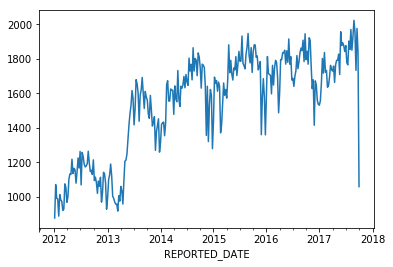

In [99]:
graph = weekly_crimes
print(graph.plot('line'))

묶은 데이터를 시각화.